<a href="https://colab.research.google.com/github/SomdebSar2002/Collab_GIT_BTP/blob/main/dendrite_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


THE SIMULATION HAS STARTED... 

THE SIMULATION HAS STARTED... 

Entering while loop
values  (10, 2)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
values  (10, 2)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
values  (20, 2)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
values  (10, 2)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
ions  (2,)
values  (0,)
values  (0,)
values  (0,)
values  (0,)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
8

<ipython-input-25-613d86e78a4e>:176: RuntimeWarning: invalid value encountered in double_scalars
  direction = [(val[i][0] - target_position[0]) / distance, (val[i][1] - target_position[1]) / distance]


[0.23191052268149911, 13.6]  E x =  0.0  E y =  0.0    1
A =  [-1.05412703e-07 -8.66496507e-08]    B =  [2.04176422e-32 0.00000000e+00]  ions =  [0.23191052268149911, 13.6]  E x =  0.0  E y =  0.0    1
A =  [1.00627071e-07 9.21639436e-08]    B =  [2.81222035e-31 0.00000000e+00]  ions =  [0.23191052268149911, 13.6]  E x =  0.0  E y =  0.0    1
A =  [ 6.09963035e-08 -1.22063307e-07]    B =  [6.26874286e-31 0.00000000e+00]  ions =  [0.23191052268149911, 13.6]  E x =  0.0  E y =  0.0    1
A =  [-9.73376253e-09 -3.74867159e-08]    B =  [1.30574416e-31 0.00000000e+00]  ions =  [0.23191052268149911, 13.6]  E x =  0.0  E y =  0.0    1
A =  [ 1.85228619e-08 -3.40132855e-08]    B =  [9.68887545e-33 0.00000000e+00]  ions =  [0.23191052268149911, 13.6]  E x =  0.0  E y =  0.0    1
A =  [ 3.71663164e-08 -1.08933431e-08]    B =  [-1.69453223e-33  0.00000000e+00]  ions =  [0.23191052268149911, 13.6]  E x =  0.0  E y =  0.0    1
A =  [ 2.43591503e-08 -3.01103270e-08]    B =  [1.45569579e-29 0.00000000

FileNotFoundError: ignored

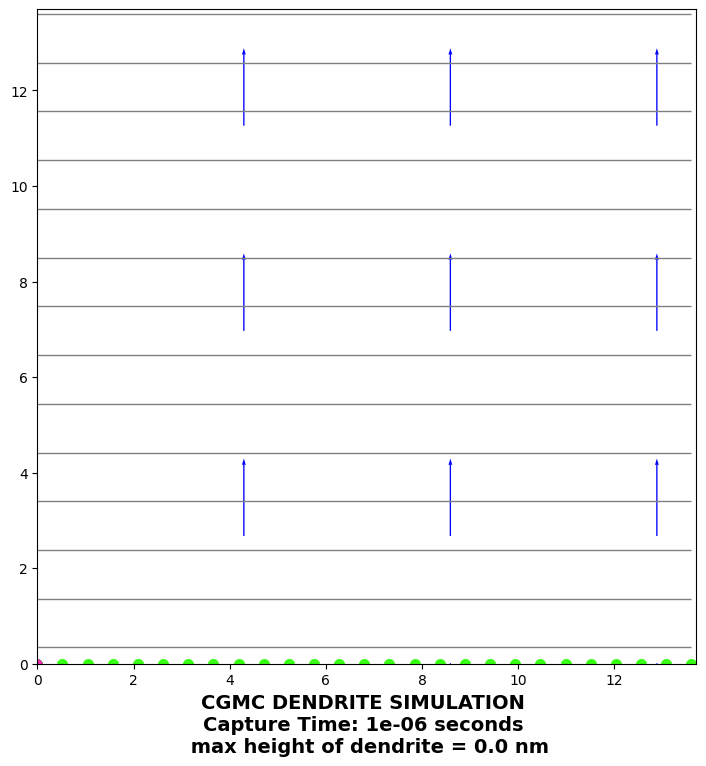

In [25]:
# dendrite_revised
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import time
from scipy.spatial import cKDTree

start = time.time()
#time step in seconds
''' upto index 4 are ions '''
# Ionic Radii (in nanometers)
sizes= {"H+":0.053, "Mg2+":0.065, "NO3-":0.3, "H2PO4-":0.4,  "Mg(H2PO4)+":0.25, "Mg(NO3)2":0.6, "H3PO4":0.6, "HNO3":0.5}
#questionable datas Mg9H
#data sources realted to P_asn
#data sources realted to P_diss
#data sources related to every variables considered here
p_asn = {"HNO3":0.132,"H3PO4":0.966,"Mg(NO3)2":0.316,"Mg(H2PO4)+":0.98} #porbability of association
#we need to nomalise or look for this in internet
p_diss = {"HNO3":1-0.132,"H3PO4":1-0.966,"Mg(NO3)2":1-0.316,"Mg(H2PO4)+":1-0.98} #porbability of association
size_mhpt = 0.25 #in nm

# sizes = np.array( [0.053, 0.065, 0.3, 0.4, 0.65, 0.6, 0.6, 0.5])
                   #H+ Mg2+ NO3- H2PO4-  Mg(H2PO4)+ Mg(NO3)2 H3PO4 HNO3
# Diffusion Coefficients in square meters per second (m²/s)

D_coeff = {"H+":9.31e-9, "Mg2+":7.5e-10, "NO3-":1.0e-9, "H2PO4-":8.67e-10,  "Mg(H2PO4)+":7.5e-10, "Mg(NO3)2":1.25e-9, "H3PO4":1.25e-9, "HNO3":1.1e-9}

# color = {"H+":"#75FB4", "Mg2+":"#EA3323", "NO3-":"215212", "H2PO4-":"EA33B2",  "Mg(H2PO4)+":"0000F5", "Mg(NO3)2":"469DF8", "H3PO4":"F7042BA", "HNO3":"905146"}
color = {
    "H+": (117, 251, 180),
    "Mg2+": (234, 51, 35),
    "NO3-": (33, 82, 18),
    "H2PO4-": (234, 51, 178),
    "Mg(H2PO4)+": (0, 0, 245),
    "Mg(NO3)2": (70, 157, 248),
    "H3PO4": (247, 4, 43),
    "HNO3": (144, 81, 70)
}
color = {key: (r / 255, g / 255, b / 255) for key, (r, g, b) in color.items()}
# const = np.array([
#     9.31e-9,   # H+ (Hydrogen ion) in water at 25°C
#     7.5e-10,   # Mg2+ (Magnesium ion) in water at 25°C
#     1.0e-9,    # NO3- (Nitrate ion) in water at 25°C
#     8.67e-10,  # H2PO4- (Dihydrogen phosphate ion) in water at 25°C
#     7.5e-10,   # Mg(H2PO4)+ (Magnesium Dihydrogen Phosphate) in water at 25°C
#     1.25e-9,   # Mg(NO3)2 (Magnesium Nitrate) in water at 25°C
#     1.25e-9,   # H3PO4 (Phosphoric Acid) in water at 25°C
#     1.1e-9    # HNO3 (Nitric Acid) in water at 25°C
# ])

kb = 8.6173303 * 1e-5   #it's in ev/k
#chck
charge_dict = {"H+": 1, "Mg2+": 2, "NO3-": -1, "H2PO4-": -1, "Mg(H2PO4)+": 1, "Mg(NO3)2": 0, "H3PO4": 0, "HNO3": 0}
elementary_charge = 1.609 * 1e-19  # in C

q = {}
for species, charge in charge_dict.items():
    q[species] = charge * elementary_charge

T  = 298                #it's in K obviously!!

Mu = {}
#link for calculation
for species, D in D_coeff.items():
    Mu[species] = q[species] * D / (kb * T)



del_t = 10 ** -6                                        # i.e., micro seconds
d_att =  size_mhpt # nm                                     # distance of attraction in nano metre
d_att2 = (d_att) * 2  #  nm                             # cutoff distance
V_cathode = 0 # volts                                   # voltage of cathode and anode
V_anode = 2 # volts

# ion_radius = 0.12    # nm                                 nanometre
# d2 = 1.3 * sizes                               # distance for smoothening the voltage
# D_coeff = 1.4 * 10 ** (-14) #metre ^2 / second          # diffusion coefficient of Li ion
# Mu = 5.6 * 10 ** (-13) #metre^2 /(Volt second)          # mobility of Li ion
theta = {}
eeta = {}
for species, D in D_coeff.items():
    theta[species] = math.sqrt(2 * D * del_t)
    eeta[species] = Mu[species] * del_t


#from diff coeff
La , Lb = 13.6 , 13.6                                   # domain size La x Lb in nano metres
#defining the system size
m = 20
n = 20
x = np.linspace(0, La, m)
y = np.linspace(0, Lb, n)
potential_ion_values= {}
xv , yv = np.meshgrid(x , y , indexing='xy')

# start = time.time()
#time step in seconds

# del_t = 10 ** -6                                        # i.e., micro seconds
qc = 1.6 * 10**(-19)                                       # coulombs
k = 8.9875 * 10**(9)
# d_att =  0.238 # nm                                     # distance of attraction in nano metre
# atomic_radius = 0.155    # nm                             nanometre
# d_att2 = atomic_radius * 1.5  #  nm                     # cutoff distance
# V_cathode = 0 # volts                                   # voltage of cathode and anode
# V_anode = -0.085 # volts
# ion_radius = 0.12    # nm                                 nanometre
# d2 = 1.3 * ion_radius                                   # distance for smoothening the voltage
# D_coeff = 1.4 * 10 ** (-14) #metre ^2 / second          # diffusion coefficient of Li ion
# Mu = 5.6 * 10 ** (-13) #metre^2 /(Volt second)          # mobility of Li ion
# theta = math.sqrt(2 * D_coeff * del_t)
# eeta = Mu * del_t
# La , Lb = 16.7 , 16.7                                   # domain size La x Lb in nano metres
# #defining the system size
# m = 50
# n = 50
# x = np.linspace(0, La, m)
# y = np.linspace(0, Lb, n)
# xv , yv = np.meshgrid(x , y , indexing='xy')
potential_values = np.zeros((len(x),len(y)) , dtype = float)
for i in range(1,m-1):
    for j in range(1,n-1):
        b = potential_values
        b[0][:] = V_anode   #negative
        b[m-1][:] = V_cathode   #positive
        b[i][j] = V_anode + ((V_cathode - V_anode) * i/m)
        potential_values = b
def swap(var1, var2):
    temp = var1
    var1 = var2
    var2 = temp
    return var1, var2

def find_combination(name1,name2):
    if name1=="H+" and name2 == "NO3-":
        return "HNO3"
    elif name1 == "Mg2+" and name2 == "NO3-":
        return "Mg(NO3)2"
    elif name1 == "H+" and name2 == "H2PO4-":
        return "H3PO4"
    elif name1 == "Mg2+" and name2 == "H2PO4-":
        return "Mg(H2PO4)+"
    else:
        swap(name1,name2)
        if name1=="H+" and name2 == "NO3-":
            return "HNO3"
        elif name1 == "Mg2+" and name2 == "NO3-":
            return "Mg(NO3)2"
        elif name1 == "H+" and name2 == "H2PO4-":
            return "H3PO4"
        elif name1 == "Mg2+" and name2 == "H2PO4-":
            return "Mg(H2PO4)+"
        else:
            return "NA"

def calculate_potential(charge, distance):
    if distance==0:
        return 0
    return k * charge / distance

def calculate_electric_field(distance,key, own_key, direction):
    if distance == 0:
        return[0,0]
    potential = calculate_potential( 1 * qc *charge_dict[key]*charge_dict[own_key], distance)
    magnitude = -potential / distance
    return [magnitude * d for d in direction]

def calculate_resultant_electric_field(ion_positions, target_position,own_key):
    total_electric_field_x = 0  # Initialize total electric field x-component
    total_electric_field_y = 0  # Initialize total electric field y-component
    for key,val in ion_positions.items():
        for i in range(len(val)):
            # Calculate distance and direction
            distance = np.sqrt((val[i][0] - target_position[0])**2 + (val[i][1] - target_position[1])**2)
            direction = [(val[i][0] - target_position[0]) / distance, (val[i][1] - target_position[1]) / distance]

            # Calculate electric field due to the i-th ion
            electric_field = calculate_electric_field(distance,key,own_key,direction)

            # Add the x and y components of the electric field to the total
            total_electric_field_x += electric_field[0]
            total_electric_field_y += electric_field[1]

    return [total_electric_field_x, total_electric_field_y]

def FDM_potentials():
    epsilon = 1e-8
    V_old = np.zeros((len(x), len(y)), dtype=float)
    V_new = potential_values

    # Set boundary conditions
    V_new[0, :] = V_cathode   # Positive
    V_new[(m-1), :] = V_anode    # Negative
    iterable1 = 0
    while (True):
        print(iterable1)
        iterable1 = iterable1+1
        V_old = V_new.copy()  # Store the current values in V_old
        for i in range(1, m-1):
            for j in range(0, n):
                V_new[i, j] = 0.25 * (V_old[i+1, j % n] +
                                      V_old[i-1, j % n] +
                                      V_old[i, (j + 1) % n] +
                                      V_old[i, (j - 1) % n])

        diff = np.amax(np.abs(np.round((V_new - V_old), decimals=9)))
        if diff < epsilon:
            break

    # print(V_new)
    # plt.imshow(V_new)
    # plt.colorbar()
    # plt.show()
    return V_new

def FDM_potentials_2_1(a_points,iter):
    epsilon = 1e-8
    print("\n fdm function is accessed")
    V_new = potentials
    V_new[0, :] = V_cathode   # Positive
    V_new[(m-1), :] = V_anode    # Negative
    iterable2 = 0
    while (True):
        print("\n FDM method is performed ")
        # time.sleep(0.05)
        print(iterable2)
        iterable2 += 1
        V_old = V_new.copy()  # Store the current values in V_old
        for i in range(1, m-1):
            for j in range(0, n):
                V_new[i, j] = 0.25 * (V_old[i+1, j % n] +
                                      V_old[i-1, j % n] +
                                      V_old[i, (j + 1) % n] +
                                      V_old[i, (j - 1) % n])

        diff = np.amax(np.abs(np.round((V_new - V_old), decimals=9)))
        for atom in a_points:
            x1, y1 = xv[atom[0], atom[1]], yv[atom[0], atom[1]]
            distances_squared = (xv - x1) ** 2 + (yv - y1) ** 2
            points_inside_circle_indices = np.where(distances_squared <= 1.3*size_mhpt)
            V_new[points_inside_circle_indices] = V_anode
        # if iterable2%1000 == 0:
        #     print("difference:  ", diff)
        if iterable2==50:
            break
    print(a_points)
    return V_new

dl = round(xv[0][1] - xv[0][0] , 6)
def FDM_Electric_Field_Vector(b):
    E_i =np.zeros((len(x),len(y)) , dtype = float)
    E_j =np.zeros((len(x),len(y)) , dtype = float)
    b = np.array(b)
    for i in range(1,m-1):
        for j in range(1,n-1):
            E_j[i, j] = (-(b[(i+m-1-1)%(m-1), (j+n-1)%(n-1)] - b[(i+m-1+1)%(m-1), (j+n-1)%(n-1)] ) / dl)
            E_i[i,j] = -(-(b[int((i+m-1)%(m-1)) , int((j+n-1-1)%(n-1))] - b[int((i+m-1)%(m-1)) , int((j+n-1+1)%(n-1))])/dl)
    return E_i , E_j

def Find_the_index(target_xi,target_yi):
    i_index=0
    j_index=0
    i_index = abs(round((target_yi/dl)))%(n-1)
    j_index = abs(round(target_xi/dl))%(m-1)
    return [i_index , j_index]

def potential_matrix_transform(potential_matrix):
    return np.flipud(potential_matrix)

def aabb_overlaps(particles1, radius1, particles2, radius2):
    for p_key, particle1_coords in particles1.items():
        for particle2_coords in particles1.items():
            for i in range(2):  # Only check x and y axes
                min_coord1 = particle1_coords[:, i] - radius1
                max_coord1 = particle1_coords[:, i] + radius1

                min_coord2 = particle2_coords[:, i] - radius2
                max_coord2 = particle2_coords[:, i] + radius2

                if np.any(max_coord1 < np.expand_dims(min_coord2, axis=1)) or np.any(min_coord1 > np.expand_dims(max_coord2, axis=1)):
                    return True  # Overlap found, return True

    return False  # No overlap found

def separate_arrays_by_column(array):
    array = np.array(array)
    separated_arrays = {}
    for row in array:
        key = row[0]
        if key not in separated_arrays:
            separated_arrays[key] = []
        separated_arrays[key].append(row)

    return {key: np.array(value) for key, value in separated_arrays.items()}

positions_ions = {}
#initializing random ions
sizes= {"H+":0.053, "Mg2+":0.065, "NO3-":0.3, "H2PO4-":0.4,  "Mg(H2PO4)+":0.65, "Mg(NO3)2":0.6, "H3PO4":0.6, "HNO3":0.5}
initial_ions = {"H+":10, "Mg2+":10, "NO3-":20, "H2PO4-":10,  "Mg(H2PO4)+":0,"Mg(NO3)2":0, "H3PO4":0, "HNO3":0}
updated_positions_ions = {}
for key,ion_num in initial_ions.items():
    positions_ions_element = []
    for i in range(0,ion_num):
        positions_ions_element.append([random.random() * La , La])
    positions_ions[key] = positions_ions_element
    updated_positions_ions[key]=np.zeros((ion_num,2))










no_of_base_atoms = 27                           #creating a base layer in anode i.e., the bottom layer of system
positions_base = np.linspace(0,La,no_of_base_atoms)
atom_matrix = np.zeros((2,no_of_base_atoms))
for i in range(no_of_base_atoms):
    atom_matrix[0][i]=positions_base[i]

atom_matrix = np.transpose(atom_matrix)
dup_atom_matrix = atom_matrix

for _ in enumerate(atom_matrix,start=0):
        dendrite_y_axis  = [abs(element[1]) for element in atom_matrix]

t=0
img1 = 0                          # img variable to pinpoint the image name from the array
img2 = 0
num_of_atom_added = 0            # number of atom added to count how much of total atom added
dendrite_height=[]
time_array=[]
dend = 0
print("\nTHE SIMULATION HAS STARTED... ")
num_ion_deleted=0

dend = 0
iteration_count = 0
iteration_inner_count=0
print("\nTHE SIMULATION HAS STARTED... ")
while (True):
    iteration_count = iteration_count + 1
    print("\nEntering while loop")
    filename1 = "53_without_contours"+str(img2)+".jpg"
    filename2 = "./dend 53 test/Only_atom_add_53_"+str(img2)+"__.jpg"
    t = t + del_t
    E_indices = {}
# finding the right electric field vector for each ion to act upon
    for key, values in positions_ions.items():
        # print("values ",values)
        print("values ",np.shape(values))
        E_indian_indices = []
        for index, ions in enumerate(values):
            # print("ions ",ions)
            print("ions ",np.shape(ions))
            E_indian_indices.append(Find_the_index(ions[0], ions[1]))
        E_indices[key] = E_indian_indices

        # here the E_indices is a n x 2 array which stores the positions of the ions
        # with respect to the mesh grid
    #  movement of the ions is defined by the equation given in the pdf page 24
    if (t == del_t):
        t1 = time.time()
        potentials = FDM_potentials()
        E_x , E_y = FDM_Electric_Field_Vector(potentials)
        E_x_t , E_y_t = potential_matrix_transform(E_x) , potential_matrix_transform(E_y)

        t2 = time.time()
        print("time of completion of one potential and one E vector calc: ", t2-t1)
    # positions_ions = np.array(positions_ions)
    # positions_ions.tolist()
        p=0

        # whole_bunch_of_ions = []
        # if len(positions_ions):
        #     for key in positions_ions:
        #         whole_bunch_of_ions.append(positions_ions[key])
        # whole_bunch_of_ions = np.array(whole_bunch_of_ions)
        # ion_atom_combine = np.vstack((whole_bunch_of_ions,atom_matrix))


    for p, ((key1, ion_num1), (_, E_index)) in enumerate(zip(positions_ions.items(), E_indices.items()), start=0):
        for ion1,E_idx in zip(ion_num1,E_index):
            a_vector = random.uniform(-1, 1)
            b_vector = random.uniform(-1,1)
            mod_of_a_and_b = math.sqrt(a_vector **2 + b_vector **2)
            # g is a normalized 2 D vector
            g = np.array([a_vector/mod_of_a_and_b , b_vector/mod_of_a_and_b])
            A = [g_vector * theta[key1] for g_vector in g]
        #    calculate_resultant_electric_field(ion_positions, target_position,own_key):
            C = calculate_resultant_electric_field(positions_ions,ion1,key1)
            E_resultant = [(E_x_t[E_idx[0]][E_idx[1]] + C[0]) ,(E_y_t[E_idx[0]][E_idx[1]] + C[1])]
            B = [ 10e5*eeta[key1] * E_resultant[0] ,10e5*eeta[key1] * E_resultant[1]]
            A =np.array(A)
            B =np.array(B)
            print('A = ',A,'   B = ',B,' ions = ',ions,' E x = ',E_x_t[E_idx[0]][E_idx[1]],' E y = ',E_y_t[E_idx[0]][E_idx[1]],"  ",iteration_count)
            updated_positions_ions[key1][p] =(A + B +  np.round(np.array((ions)) * (10 ** -9) , decimals=20)  )/10**-9

    positions_ions = updated_positions_ions
    # kdtree = cKDTree(list([positions_ions].values()))

    # Set the radius within which to find nearest ions
    # position_to_name_and_coord = {}
    # for key,values in positions_ions.items():
    #     for value in values:
    #         s = str(value[0]) + " " + str(value[1])
    #         position_to_name_and_coord[s] = [key,[value]]

    num_ion_deleted = 0 #this variable counts the number of ions deleted and it helps in adding the same amount of ion in the next iteration.

    # # Loop through each ion and find nearest ions within the radius
    # for ion_name, ion_coords in positions_ions.items():
    #     # Query for neighbors within the specified radius
    #     for i,ion_coord in enumerate(ion_coords,start=0):
    #         neighbors_indices = kdtree.query_ball_point(ion_coord, r=sizes[ion_name]*2)

    #     # Flatten the list of lists and filter out the index of the ion itself

    #         name,value = position_to_name_and_coord[neighbors_indices]

    #         p = random.uniform(0,1)
    #         if p<p_asn[i]:
    #             #form the combined molecule
    #             c = find_combination(ion_name,name)
    #             if c!="NA":
    #                 p = (int)(random.uniform(0,1)*2)
    #                 coor = []
    #                 if p<0.5:
    #                     coor = neighbors_indices
    #                 else:
    #                     coor = ion_coord
    #                 positions_ions[c].append(coor)
    #                 position_to_name_and_coord[coor] =c,positions_ions.index(c)
    #                 del positions_ions[name][value]
    #                 del positions_ions[ion_name][i]
    #         elif p<p_diss[name]:
    #             if c=="Mg(H2PO4)+":
    #                 positions_ions["H2PO4-"].append([ion_coord[0]+sizes["H2PO4-"],ion_coord[1]+sizes["H2PO4-"]])
    #                 positions_ions["Mg2+"].append([ion_coord[0]-sizes["Mg2+"],ion_coord[1]-sizes["Mg2+"]])
    #                 del positions_ions[name][value]
    #             if c=="HNO3":
    #                 positions_ions["H+"].append([ion_coord[0]+sizes["H+"],ion_coord[1]+sizes["H+"]])
    #                 positions_ions["NO3-"].append([ion_coord[0]-sizes["NO3-"],ion_coord[1]-sizes["NO3-"]])
    #                 del positions_ions[name][value]
    #             if c=="Mg(NO3)2":
    #                 positions_ions["H+"].append([ion_coord[0]+sizes["H+"],ion_coord[1]+sizes["H+"]])
    #                 positions_ions["NO3-"].append([ion_coord[0]-sizes["NO3-"],ion_coord[1]-sizes["NO3-"]])
    #                 positions_ions["NO3-"].append([ion_coord[0]-2*sizes["NO3-"],ion_coord[1]-2*sizes["NO3-"]])
    #                 del positions_ions[name][value]

    plt.figure(figsize=(8.5,8.5))
    ax = plt.axes()
    ssf = 6 #subsample_factor
    magnitude = np.sqrt(E_x ** 2 + E_y ** 2)
    Ex_norm = E_x / np.amax(magnitude)
    Ey_norm = E_y / np.amax(magnitude)
    E_x_t , E_y_t = potential_matrix_transform(Ex_norm), potential_matrix_transform(Ey_norm)
    ax.quiver(xv[::ssf, ::ssf],  # Subsampled X-coordinates
                yv[::ssf, ::ssf],  # Subsampled Y-coordinates
                E_x_t[::ssf, ::ssf],  # Subsampled X-components
                E_y_t[::ssf, ::ssf],  # Subsampled Y-components
                scale=1,width=0.002 , color='blue',pivot='tip')  # Adjust the arrow length
    a_mat_combined = np.vstack((dup_atom_matrix,atom_matrix))
    atom_matrix_T = np.transpose(a_mat_combined)
    ax.scatter(atom_matrix_T[0][:],atom_matrix_T[1][:],c='#39FF14',s=45)
    #only transpose positions_ions array while plotting
    for i, (key, coordinates) in enumerate(positions_ions.items()):
      if not coordinates.size == 0:
          x_values, y_values = zip(*coordinates)
          ax.scatter(x_values, y_values, color=color[key])
    potentials_Mirror_Transform = potential_matrix_transform(potentials)
    ax.contour(xv,yv,potentials_Mirror_Transform,levels = 13,colors = 'gray',linestyles='None',linewidths=1)
    ax.set_xlabel('CGMC DENDRITE SIMULATION \nCapture Time: '+ str(round(t,8))+" seconds \n max height of dendrite = "+str(abs(max(dendrite_y_axis)))+" nm", loc = 'center',fontsize=14,fontweight='bold',fontname= 'Times New Roman' )
    ax.set_xlim(0,13.7)
    ax.set_ylim(0,13.7)
    plt.savefig(filename2,dpi = 350)
    # print("the image is under the name",filename2)
    plt.close()
    #distance calculation between the ions and atoms and
    #deciding whether to attach it to the dendrite

    ion_to_atom_transfer = []
    for index_ion , ion  in enumerate(positions_ions['Mg(H2PO4)+']):
        for index_atom , atom in enumerate(atom_matrix):
            dist = np.sqrt(((ion[0] - atom[0])**2 + (ion[1] - atom[1])**2))
            if (dist < d_att2) or (dist==d_att2):
                ion_to_atom_transfer.append([index_ion,index_atom,dist,ion[0],ion[1]])

    if len(ion_to_atom_transfer)>0:
        seperated_transfer_matrix = separate_arrays_by_column(ion_to_atom_transfer)
        for key,value in seperated_transfer_matrix.items():
            for _ in enumerate(value,start=0):
                dist_btw_ions_atoms  = [element[2] for element in value]

            min_dist = min(dist_btw_ions_atoms,key=abs)
            i_m_d = dist_btw_ions_atoms.index(min_dist) #index of minimum distance is i_m_d
            atom_index = value[i_m_d][1]
            normalize_x = (positions_ions[int(key)][0] - atom_matrix[int(atom_index)%len(atom_matrix),0]) / abs(min_dist)
            normalize_y = (positions_ions[int(key)][1] - atom_matrix[int(atom_index)%len(atom_matrix),1]) / abs(min_dist)
            print("length of positions ions ",len(positions_ions)," key value ",int(key)," position_ion is : ",positions_ions[int(key)])
            new_atom_array = [ (atom_matrix[int(atom_index)%len(atom_matrix),0] + normalize_x * d_att)%16.7 , (atom_matrix[int(atom_index)%len(atom_matrix),1] + normalize_y * d_att)%16.7 ]
            print("atom position: ",atom_matrix[int(atom_index)%len(atom_matrix),1]," atom index : ", atom_index)
            print("\n",new_atom_array)
            positions_ions = positions_ions.tolist()
            del positions_ions[int(key)]
            positions_ions = np.array(positions_ions)
            num_ion_deleted = num_ion_deleted + 1
            # adding to the atom list
            atom_matrix = atom_matrix.tolist()
            atom_matrix.append(new_atom_array)
            atom_matrix = np.array(atom_matrix)
            mask = np.isin(atom_matrix, dup_atom_matrix).all(axis=1)
            atom_matrix = atom_matrix[~mask]

            points_atom= []
            for q in atom_matrix:
                new_array = Find_the_index(q[0],abs(q[1] - La))
                points_atom.append(new_array)

            # below two lines calculates the electric potentials by solving laplace equation and  subsequently electric field vector
            t1 = time.time()
            print("\n potential is being calculated.............")
            potentials = np.array(potentials,dtype=float)
            potentials = FDM_potentials_2_1(points_atom,iteration_count)
            E_x , E_y = FDM_Electric_Field_Vector(potentials)
            t2 = time.time()




            print("time of completion of one potential and one E vector calc: ", t2-t1)
            plt.figure(figsize=(8.5,8.5))
            ax = plt.axes()
            ssf = 6 #subsample_factor
            magnitude = np.sqrt(E_x ** 2 + E_y ** 2)
            Ex_norm = E_x / np.amax(magnitude)
            Ey_norm = E_y / np.amax(magnitude)
            E_x_t , E_y_t = potential_matrix_transform(Ex_norm), potential_matrix_transform(Ey_norm)
            ax.quiver(xv[::ssf, ::ssf],  # Subsampled X-coordinates
                        yv[::ssf, ::ssf],  # Subsampled Y-coordinates
                        E_x_t[::ssf, ::ssf],  # Subsampled X-components
                        E_y_t[::ssf, ::ssf],  # Subsampled Y-components
                        scale=1,width=0.002 , color='blue',pivot='tip')  # Adjust the arrow length
            a_mat_combined = np.vstack((dup_atom_matrix,atom_matrix))
            atom_matrix_T = np.transpose(a_mat_combined)
            ax.scatter(atom_matrix_T[0][:],atom_matrix_T[1][:],c='#39FF14',s=45)
            color = {key: (r / 255, g / 255, b / 255) for key, (r, g, b) in color.items()}
            atom_matrix_T = np.transpose(atom_matrix)
            ax.scatter(atom_matrix_T[0][:],atom_matrix_T[1][:],c='#39FF14',s=45)
            # Plotting ions
            for i, (key, coordinates) in enumerate(positions_ions.items()):
                if not coordinates.size == 0:
                    x_values, y_values = zip(*coordinates)
                    ax.scatter(x_values, y_values, color=color[key], label=key)
            potentials_Mirror_Transform = potential_matrix_transform(potentials)
            ax.contour(xv,yv,potentials_Mirror_Transform,levels = 13,colors = 'gray',linestyles='None',linewidths=1)
            ax.set_xlabel('CGMC DENDRITE SIMULATION \nCapture Time: '+ str(round(t,8))+" seconds \n max height of dendrite = "+str(abs(max(dendrite_y_axis)))+" nm", loc = 'center',fontsize=14,fontweight='bold',fontname= 'Times New Roman' )
            ax.set_xlim(0,16.7)
            ax.set_ylim(0,16.7)
            plt.savefig(filename2,dpi = 350)
            # print("the image is under the name",filename2)
            plt.close()
            # if img2%4 ==0:
            #     plt.figure(figsize=(8.5,8.5))
            #     ax = plt.axes()
            #     ax.quiver(xv[::ssf, ::ssf],  # Subsampled X-coordinates
            #             yv[::ssf, ::ssf],  # Subsampled Y-coordinates
            #             E_x_t[::ssf, ::ssf],  # Subsampled X-components
            #             E_y_t[::ssf, ::ssf],  # Subsampled Y-components
            #             scale=0.8 , color='blue',pivot='tip')  # Adjust the arrow length
            #     ax.scatter(atom_matrix_T[0][:],atom_matrix_T[1][:],c='#39FF14',s=45)
            #     #only transpose positions_ions array while plotting
            #     ax.contour(xv,yv,potentials_Mirror_Transform,levels = 13,colors = 'gray',linestyles='None',linewidths=1)
            #     start_points = np.round(np.array(positions_ions), decimals=32)
            #     kdtree = cKDTree(positions_ions)
            #     for isp,s_p in enumerate(start_points):
            #         indices = kdtree.query_ball_point(s_p, 2)
            #         for ind in indices:
            #             x_ind, y_ind = positions_ions[ind]
            #             # Calculate the arrow components
            #             dx = -(x_ind - s_p[0]) / 2
            #             dy = -(y_ind - s_p[1]) / 2
            #             # Plot the arrow
            #             ax.quiver(x_ind, y_ind, dx, dy, angles='xy', scale_units='xy', scale=1,color = 'k', width=0.003, headwidth=5,alpha=0.3)
            #             # Reverse direction
            #             dx = -(s_p[0] - x_ind) / 2
            #             dy = -(s_p[1] - y_ind) / 2
            #             # Plot the arrow in the reverse direction
            #             ax.quiver(s_p[0], s_p[1], dx, dy, angles='xy', scale_units='xy', scale=1,color = 'k', width=0.003, headwidth=5,alpha=0.3)
            #     # ax.scatter(positions_ions_T[0,:],positions_ions_T[1,:],c='red',s=40)
            #     ax.set_xlabel('CGMC DENDRITE SIMULATION \nCapture Time: '+ str(round(t,8))+" seconds \n max height of dendrite = "+str(abs(max(dendrite_y_axis)))+" nm", loc = 'center',fontsize=14,fontweight='bold',fontname= 'Times New Roman' )
            #     ax.set_xlim(0,16.7)
            #     ax.set_ylim(0,16.7)
            #     plt.savefig(filename1,dpi = 400)
            #     # print("the image is under the name",filename2)
            #     plt.close()

            img2 = img2 + 1



    if len(ion_to_atom_transfer)>0:
        for _ in range(0,num_ion_deleted):
            positions_ions["Mg(H2PO4)+"] = positions_ions.tolist()
            positions_ions["Mg(H2PO4)+"].append([random.random() * La , La])
            positions_ions["Mg(H2PO4)+"] = np.array(positions_ions["Mg(H2PO4)+"])
        #  after this we have to assign the new atom positions into V_anode, and smoothen it by including many points
        # the smoothening is done in the FDM_potentials2() function itself.
        mask = np.isin(atom_matrix, dup_atom_matrix).all(axis=1)
        atom_matrix = atom_matrix[~mask]

        points_atom= []
        for q in atom_matrix:
            new_array = Find_the_index(q[0],abs(q[1] - La))
            points_atom.append(new_array)
        atom_matrix = a_mat_combined

    # now to check if the length of the dendrite exceeds the La - 0.1
    for _ in enumerate(atom_matrix,start=0):
        dendrite_y_axis  = [abs(element[1]) for element in atom_matrix]
    dendrite_height.append(max((dendrite_y_axis)))
    time_array.append(t)
    dend = dend+1
    # if the maximum of the dendrite is greater than or equal to  La - 0.4, then stop the simulation
    # if max(dendrite_y_axis) >= 1:
    if (max(dendrite_y_axis)) >= (16):
        print(atom_matrix)
        print("the sim ended because the dendrite length has exceeded the system ")
        plt.figure(figsize=(8.5,8.5))
        ax1 = plt.axes()
        ax1.plot(time_array,dendrite_height,c='blue')
        ax1.set_xlabel('Time (seconds)',loc = 'center',fontsize=16,fontweight='bold',fontname= 'Times New Roman' )
        ax1.set_ylabel('Dendrite height (nm)',loc = 'center',fontsize=16,fontweight='bold',fontname= 'Times New Roman' )
        ax1.set_xlim(min(time_array),max(time_array))
        ax1.set_ylim(min(dendrite_height),max(dendrite_height))
        plt.savefig("dendrite height vs time.jpg",dpi = 600)
        plt.close()
        break

end = time.time()
print("\n \n The total time of computation is : ",(end-start)/60," minutes    \n",(end-start)/3600," hours     or   \n",(end-start)," seconds")
print("\n\n SIMULATION COMPLETED")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
print(positions_ions.keys())


dict_keys(['H+', 'Mg2+', 'NO3-', 'H2PO4-', 'Mg(H2PO4)+', 'Mg(NO3)2', 'H3PO4', 'HNO3'])


In [4]:
positions_ions

{'H+': array([[-27.80322392, 147.06402135],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ]]),
 'Mg2+': array([[  0.        ,   0.        ],
        [-24.75006007,  42.87163028],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ]]),
 'NO3-': array([[  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [-43.89290334,  18.00716813],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,  

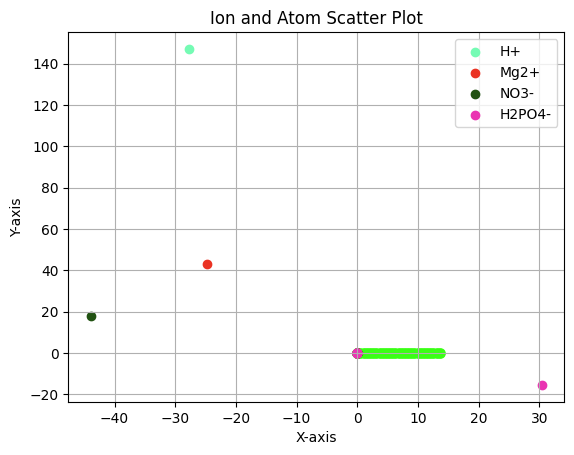

In [13]:
color = {
    "H+": (117, 251, 180),
    "Mg2+": (234, 51, 35),
    "NO3-": (33, 82, 18),
    "H2PO4-": (234, 51, 178),
    "Mg(H2PO4)+": (0, 0, 245),
    "Mg(NO3)2": (70, 157, 248),
    "H3PO4": (247, 4, 43),
    "HNO3": (144, 81, 70)
}

# Normalize RGB values to be in the range [0, 1]
color = {key: (r / 255, g / 255, b / 255) for key, (r, g, b) in color.items()}
atom_matrix_T = np.transpose(atom_matrix)
plt.scatter(atom_matrix_T[0][:],atom_matrix_T[1][:],c='#39FF14',s=45)
# Plotting ions
for i, (key, coordinates) in enumerate(positions_ions.items()):
    if not coordinates.size == 0:
        x_values, y_values = zip(*coordinates)
        plt.scatter(x_values, y_values, color=color[key], label=key)

# You can add more customization if needed
plt.title('Ion and Atom Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
atom_matrix_T


array([[ 0.        ,  0.52307692,  1.04615385,  1.56923077,  2.09230769,
         2.61538462,  3.13846154,  3.66153846,  4.18461538,  4.70769231,
         5.23076923,  5.75384615,  6.27692308,  6.8       ,  7.32307692,
         7.84615385,  8.36923077,  8.89230769,  9.41538462,  9.93846154,
        10.46153846, 10.98461538, 11.50769231, 12.03076923, 12.55384615,
        13.07692308, 13.6       ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [24]:
type(dendrite_y_axis)

NameError: ignored